<hr>
<div class="alert alert-warning">
<center> <h1> Business Case 2 </h1> </center> <br>
<center> 202122_Group_PN:  </center>

 <center> - Mafalda Garcia (20210763) <center> 
<center> - Simão Pereira (20210250) <center>  
<center> - Tiago Santos (20210548) <center> 
<center> - Rui Ribeiro (20211017) <center>  

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import collections
import phik

warnings.filterwarnings('ignore')

# Data Understanding and Preparation

In [124]:
data = pd.read_csv('H2.csv')
data.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [125]:
data['IsCanceled'].value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

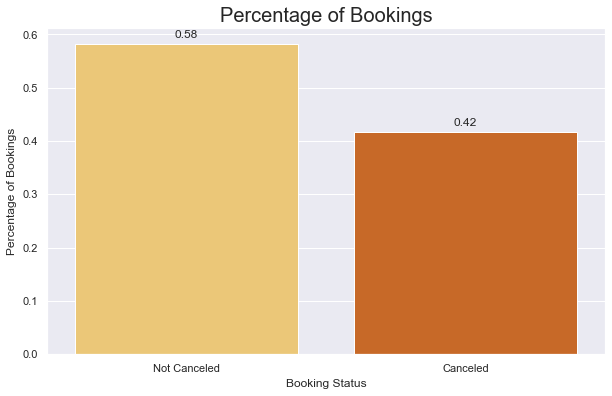

In [126]:
# To visualize the percentage of canceled and not canceled bookings
plt.figure(figsize=(10,6)) 
plt.title("Percentage of Bookings", fontsize = 20)

splot = sns.barplot(x=data['IsCanceled'].unique(), y=data['IsCanceled'].value_counts(normalize=True), palette='YlOrBr')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [128]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.41727,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.09137,0.372177,0.0,0.0,0.0,0.0,3.0


In [129]:
data.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [130]:
data.replace("", np.nan, inplace=True)

data.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [131]:
data1 = data.copy()

In [132]:
#Removing rows with null values
data1.dropna(inplace =True)

In [133]:
data1.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

### Changing the data types of some variables

In [134]:
data1['Meal'] = data1['Meal'].str.replace(' ', '')
data1['ReservedRoomType'] = data1['ReservedRoomType'].str.replace(' ', '')
data1['AssignedRoomType'] = data1['AssignedRoomType'].str.replace(' ', '')
data1['DepositType'] = data1['DepositType'].str.replace(' ', '')

In [135]:
data1['Children'] = data1['Children'].astype(int)

In [136]:
data1["Agent"].replace(["       NULL"],[0],inplace = True)

In [137]:
data1["Company"].replace(["       NULL"],[0],inplace = True)

In [138]:
#To convert the 'Agent' and 'Company' column to a categorical feature
data1['Agent'] = data1['Agent'].map(lambda x: 1 if x != 0 else 0).astype(object)
data1['Company'] = data1['Company'].map(lambda x: 1 if x != 0 else 0).astype(object)

In [139]:
data1["Agent"].unique()

array([1, 0], dtype=object)

In [140]:
data1['ReservationStatusDate'] = pd.to_datetime(data1['ReservationStatusDate'])  

In [141]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79302 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   79302 non-null  int64         
 1   LeadTime                     79302 non-null  int64         
 2   ArrivalDateYear              79302 non-null  int64         
 3   ArrivalDateMonth             79302 non-null  object        
 4   ArrivalDateWeekNumber        79302 non-null  int64         
 5   ArrivalDateDayOfMonth        79302 non-null  int64         
 6   StaysInWeekendNights         79302 non-null  int64         
 7   StaysInWeekNights            79302 non-null  int64         
 8   Adults                       79302 non-null  int64         
 9   Children                     79302 non-null  int32         
 10  Babies                       79302 non-null  int64         
 11  Meal                         79302 non-nu

In [142]:
#Verify how many duplicates
data1.loc[data.duplicated(keep="first"), :]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
9,1,62,2015,July,27,2,2,3,2,0,...,NoDeposit,1,0,0,Transient,76.50,0,1,No-Show,2015-07-02
12,0,43,2015,July,27,3,0,2,2,0,...,NoDeposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0,...,NoDeposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,0,43,2015,July,27,3,0,2,2,0,...,NoDeposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,0,43,2015,July,27,3,0,2,2,0,...,NoDeposit,1,0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,0,186,2017,August,35,31,0,3,2,0,...,NoDeposit,1,0,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,0,63,2017,August,35,31,0,3,3,0,...,NoDeposit,1,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0,...,NoDeposit,1,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0,...,NoDeposit,1,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [143]:
#Removing duplicates 
data1.drop_duplicates(subset=None, keep='first', inplace=True)

In [144]:
data1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0,...,NoDeposit,1,0,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0,...,NoDeposit,1,0,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0,...,NoDeposit,1,0,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0,...,NoDeposit,1,0,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0,...,NoDeposit,1,0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0,...,NoDeposit,1,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0,...,NoDeposit,1,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0,...,NoDeposit,1,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0,...,NoDeposit,1,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Metric e non metric features

In [145]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53410 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   53410 non-null  int64         
 1   LeadTime                     53410 non-null  int64         
 2   ArrivalDateYear              53410 non-null  int64         
 3   ArrivalDateMonth             53410 non-null  object        
 4   ArrivalDateWeekNumber        53410 non-null  int64         
 5   ArrivalDateDayOfMonth        53410 non-null  int64         
 6   StaysInWeekendNights         53410 non-null  int64         
 7   StaysInWeekNights            53410 non-null  int64         
 8   Adults                       53410 non-null  int64         
 9   Children                     53410 non-null  int32         
 10  Babies                       53410 non-null  int64         
 11  Meal                         53410 non-nu

In [146]:
#To separate the non_metric_features from metric_features
non_metric_features = data1.select_dtypes(include="object").columns.to_list()
metric_features = data1.columns.drop(non_metric_features).to_list()

In [147]:
#To remove the target value, the 'IsRepeatedGuest' and the 'ReservationStatusDate' from the metric_feature list
metric_features.remove('IsRepeatedGuest')
metric_features.remove('IsCanceled')
metric_features.remove('ReservationStatusDate')
non_metric_features.append("IsRepeatedGuest")

In [148]:
print(non_metric_features, 
      
      
      "//////////",
      
      metric_features)

['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus', 'IsRepeatedGuest'] ////////// ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']


### Feature Selection

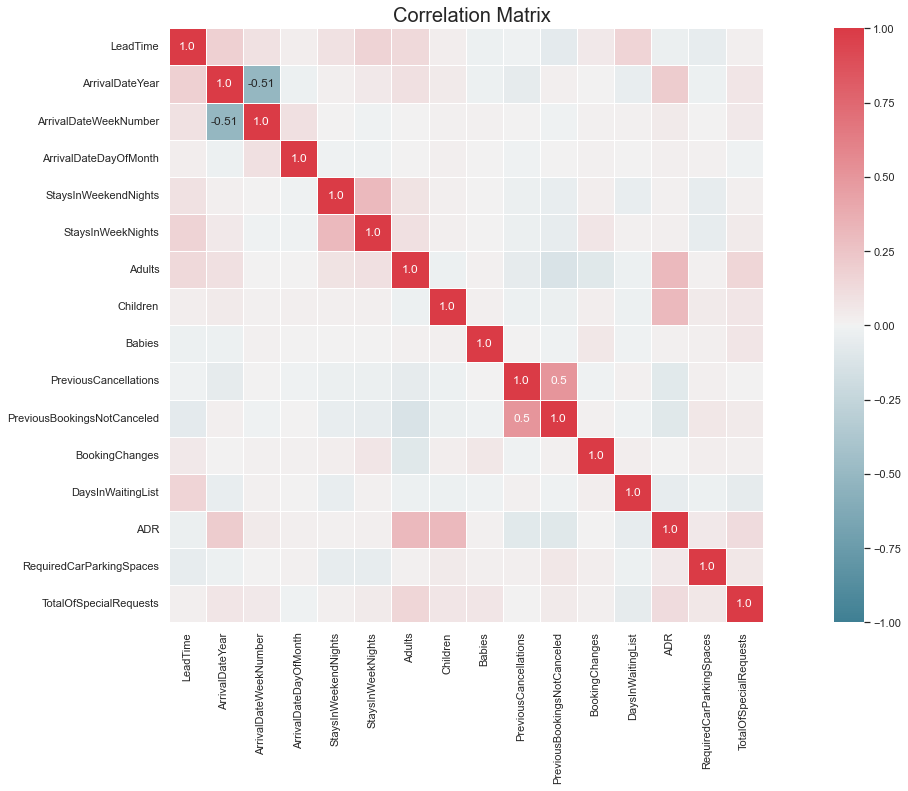

In [149]:
#To see the correlation between the matric variables
# Prepare figure
fig = plt.figure(figsize=(20, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data1[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95, left = -0.09)
fig.suptitle("Correlation Matrix", fontsize= 20)

plt.show()

In [150]:
matrix = data.phik_matrix()

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']


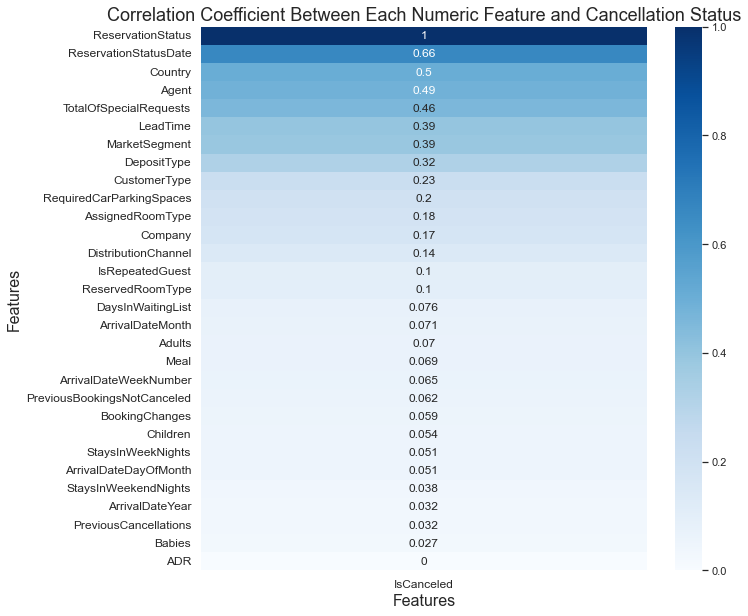

In [151]:
# To visualize correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(10,10))

ax = sns.heatmap(matrix[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')

ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);

y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

### Outliers

In [152]:
#To divide the variables that are in the metric_features to do the boxplots
metric_features_1 = metric_features[0:8]
metric_features_2 = metric_features[8:]

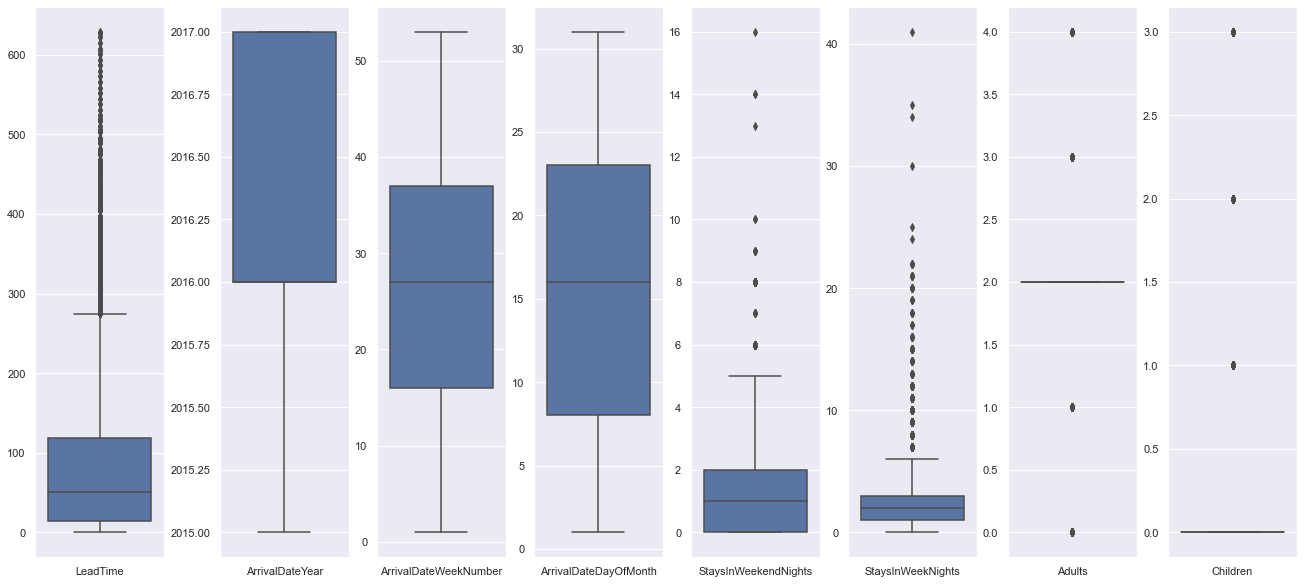

In [153]:
#To do the boxplots
sns.set()

plot_features_1 = data1[metric_features_1].columns
fig, axes = plt.subplots(1, len(plot_features_1), figsize=(18,8), constrained_layout=True)

j=0
k=1

for i in zip(axes, plot_features_1):
    sns.boxplot(data=data1[metric_features_1].iloc[:,j:k], ax=i[0])
    
    j=j+1
    k=k+1
    
plt.show()

In [154]:
data1.loc[data['Adults'] == 0]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
332,0,132,2015,July,30,23,2,5,0,0,...,NoDeposit,1,0,0,Transient-Party,0.00,0,0,Check-Out,2015-07-30
862,0,0,2015,August,33,9,2,0,0,0,...,NoDeposit,1,0,0,Contract,0.00,0,0,Check-Out,2015-08-11
924,0,1,2015,August,33,10,1,1,0,3,...,NoDeposit,0,0,0,Transient-Party,9.00,0,0,Check-Out,2015-08-12
960,0,0,2015,August,33,10,9,20,0,0,...,NoDeposit,0,1,0,Transient,0.00,0,0,Check-Out,2015-09-08
988,0,104,2015,August,33,11,0,3,0,2,...,NoDeposit,1,0,0,Transient-Party,6.00,0,2,Check-Out,2015-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77144,0,296,2017,July,30,27,1,3,0,2,...,NoDeposit,1,0,0,Transient,98.85,0,1,Check-Out,2017-07-31
77214,0,276,2017,July,31,30,2,1,0,2,...,NoDeposit,1,0,0,Transient,93.64,0,2,Check-Out,2017-08-02
77243,0,291,2017,July,30,29,2,2,0,2,...,NoDeposit,1,0,0,Transient,98.85,0,1,Check-Out,2017-08-02
77393,0,159,2017,July,31,31,1,3,0,2,...,NoDeposit,1,0,0,Transient,121.88,0,1,Check-Out,2017-08-04


In [155]:
data1.shape

(53410, 31)

In [156]:
# % de data deleted
370/79302

0.0046657083049607825

In [157]:
#Removing rows with adults = 0
data1.drop(data1.loc[data1['Adults']==0].index, inplace=True)

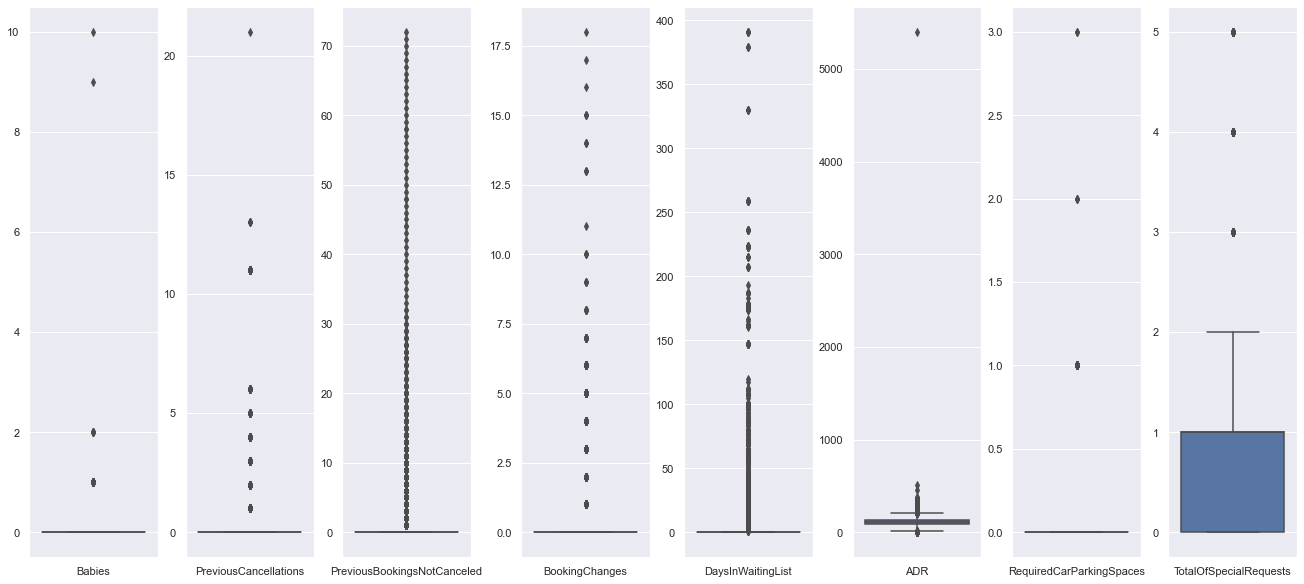

In [158]:
#To do the boxplots
sns.set()

plot_features_2 = data1[metric_features_2].columns
fig, axes = plt.subplots(1, len(plot_features_2), figsize=(18,8), constrained_layout=True)

j=0
k=1

for i in zip(axes, plot_features_2):
    sns.boxplot(data=data1[metric_features_2].iloc[:,j:k], ax=i[0])
    
    j=j+1
    k=k+1
    
plt.show()

In [159]:
filters = (
    (data1['Babies']<=5)
    &
    (data1['ADR']<=1000)
    &
    (data1['RequiredCarParkingSpaces']<2)
)

data2 = data1[filters]

# Featuring Engineering

In [160]:
data2["ArrivalDateMonth"].replace(["January","February","March","April","May","June","July","August","September","October","November","December"], [1,2,3,4,5,6,7,8,9,10,11,12], inplace= True)

In [161]:
# New feature for the arrival date in full: 
data2['ArrivalDate'] = data2['ArrivalDateYear'].astype(str) + "-" + data2['ArrivalDateMonth'].astype(str) + "-" + data2['ArrivalDateDayOfMonth'].astype(str)
data2['ArrivalDate'] = pd.to_datetime(data2['ArrivalDate'], format="%Y-%m-%d")

In [162]:
data2

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate
0,0,6,2015,7,27,1,0,2,1,0,...,1,0,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-07-01
1,1,88,2015,7,27,1,0,4,2,0,...,1,0,0,Transient,76.50,0,1,Canceled,2015-07-01,2015-07-01
2,1,65,2015,7,27,1,0,4,1,0,...,1,0,0,Transient,68.00,0,1,Canceled,2015-04-30,2015-07-01
3,1,92,2015,7,27,1,2,4,2,0,...,1,0,0,Transient,76.50,0,2,Canceled,2015-06-23,2015-07-01
4,1,100,2015,7,27,2,0,2,2,0,...,1,0,0,Transient,76.50,0,1,Canceled,2015-04-02,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,8,35,30,2,5,2,0,...,1,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
79326,0,102,2017,8,35,31,2,5,3,0,...,1,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
79327,0,34,2017,8,35,31,2,5,2,0,...,1,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
79328,0,109,2017,8,35,31,2,5,2,0,...,1,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [163]:
# New feature for the length of the stay / Number of days before arrival for the customer to cancel:
data2['CancelationTime'] = np.abs(data2['ArrivalDate'] - data2['ReservationStatusDate']).astype(str)

In [164]:
#Seasons
# 1 - Inverno
# 2- Primavera
# 3- Verão
# 4- Outono

data2["ArrivalDateMonth"].replace([12,1,2,3,4,5,6,7,8,9,10,11], [1,1,1,2,2,2,3,3,3,4,4,4], inplace= True)
data2.rename(columns = {'ArrivalDateMonth' : 'Seasons'}, inplace = True)

### Final metric/ non metric features

In [165]:
non_metric_features.remove("Meal") #In our understanding it does not affect the cancelation decision
non_metric_features.remove("ReservationStatus") 
metric_features.remove("ArrivalDateYear")
metric_features.remove("ArrivalDateDayOfMonth")
metric_features.remove("RequiredCarParkingSpaces")
metric_features.remove("ArrivalDateWeekNumber")
non_metric_features.remove("ArrivalDateMonth")
non_metric_features.append("Seasons")
non_metric_features.remove("Country") #Bias variable because most of the customers came from Portugal

In [166]:
metric_features

['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'TotalOfSpecialRequests']

### Analysis and Visualization

In [167]:
data2.to_excel("Data2 Analysis.xlsx")

In [168]:
matrix = data3.phik_matrix()

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'Seasons', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'x0_Complementary', 'x0_Corporate', 'x0_Direct', 'x0_Groups', 'x0_Offline TA/TO', 'x0_Online TA', 'x1_Direct', 'x1_GDS', 'x1_TA/TO', 'x2_B', 'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G', 'x3_B', 'x3_C', 'x3_D', 'x3_E', 'x3_F', 'x3_G', 'x3_K', 'x4_NonRefund', 'x4_Refundable', 'x5_Group', 'x5_Transient', 'x5_Transient-Party']


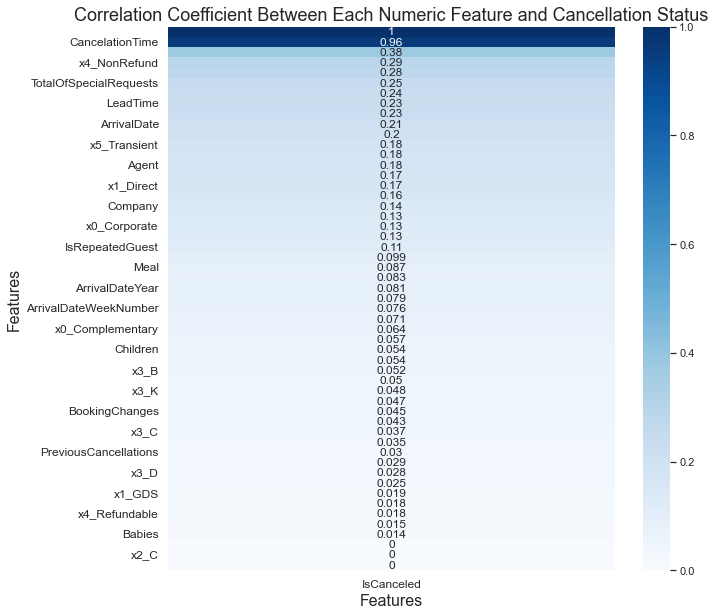

In [169]:
# To visualize correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(10,10))

ax = sns.heatmap(matrix[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')

ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);

y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [170]:
data2.loc[data3['IsCanceled'] == 1]

,IsCanceled,LeadTime,ArrivalDateYear,Seasons,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,CancelationTime
1,1,88,2015,3,27,1,0,4,2,0,...,0,0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01,0 days
2,1,65,2015,3,27,1,0,4,1,0,...,0,0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01,62 days
3,1,92,2015,3,27,1,2,4,2,0,...,0,0,Transient,76.5,0,2,Canceled,2015-06-23,2015-07-01,8 days
4,1,100,2015,3,27,2,0,2,2,0,...,0,0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02,91 days
5,1,79,2015,3,27,2,0,3,2,0,...,0,0,Transient,76.5,0,1,Canceled,2015-06-25,2015-07-02,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,1,25,2017,2,18,6,2,1,1,0,...,1,0,Transient,125.0,0,0,No-Show,2017-05-06,2017-05-06,0 days
71295,1,4,2017,3,23,5,1,0,1,0,...,1,0,Transient,65.0,0,0,Canceled,2017-06-05,2017-06-05,0 days
71864,1,7,2017,2,22,31,0,1,1,0,...,1,0,Transient,65.0,0,0,Canceled,2017-05-31,2017-05-31,0 days
71865,1,6,2017,3,29,17,1,0,1,0,...,1,0,Transient,65.0,0,0,No-Show,2017-07-17,2017-07-17,0 days


In [171]:
data2.loc[data2['IsCanceled'] == 1].value_counts("Seasons")

Seasons
3    5496
2    4831
4    2923
1    2696
dtype: int64

In [193]:
data2.loc[data2['IsCanceled'] == 1].value_counts("DepositType")

DepositType
NoDeposit     15117
NonRefund       819
Refundable       10
dtype: int64

In [191]:
data2["DepositType"].value_counts()

NoDeposit     52174
NonRefund       843
Refundable       15
Name: DepositType, dtype: int64

In [192]:
(data2.loc[data2['IsCanceled'] == 1].value_counts("DepositType"))/data2["DepositType"].value_counts()

DepositType
NoDeposit     0.289742
NonRefund     0.971530
Refundable    0.666667
dtype: float64

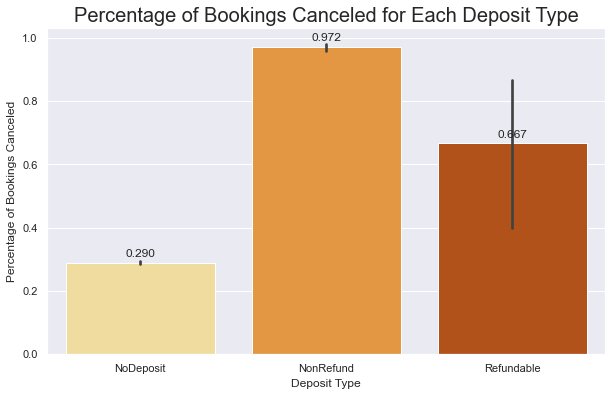

In [194]:
# To visualize ther percentage of bookings canceled for each deposit type
plt.figure(figsize=(10,6)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 20)

splot = sns.barplot(x=data2['DepositType'], y=data2['IsCanceled'], palette='YlOrBr')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

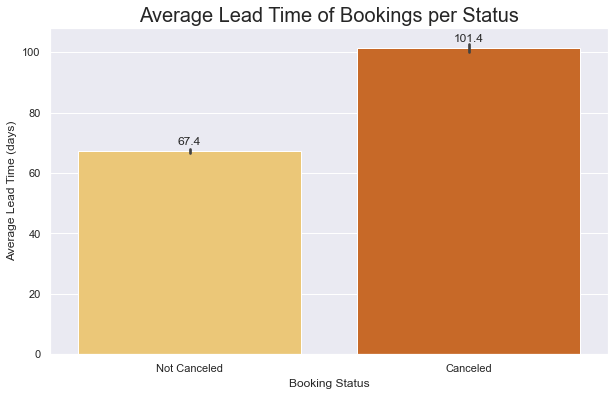

In [173]:
#To visualize the average lead time for canceled and not canceled booking
plt.figure(figsize=(10,6)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20)

splot = sns.barplot(x=data2['IsCanceled'], y=data2['LeadTime'], palette='YlOrBr')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

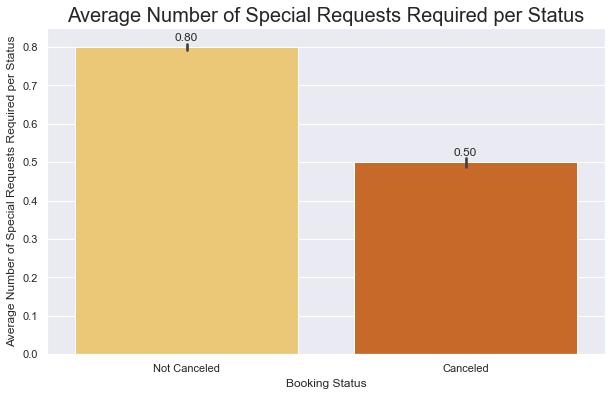

In [174]:
# To visualize the total number of requested parking spaces for canceled and not canceled bookings
plt.figure(figsize=(10,6)) 
plt.title("Average Number of Special Requests Required per Status", fontsize = 20)

splot = sns.barplot(x=data2['IsCanceled'], y=data2['TotalOfSpecialRequests'], palette='YlOrBr')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Special Requests Required per Status", fontsize = 12, labelpad = 5)

plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [175]:
data2.loc[data2['IsCanceled'] == 1].value_counts("TotalOfSpecialRequests")

TotalOfSpecialRequests
0    10046
1     4118
2     1515
3      246
4       20
5        1
dtype: int64

In [195]:
data2["TotalOfSpecialRequests"].value_counts()

0    26190
1    17905
2     7279
3     1455
4      181
5       22
Name: TotalOfSpecialRequests, dtype: int64

In [200]:
data2.loc[data2['IsCanceled'] == 0].value_counts("TotalOfSpecialRequests")/data2["TotalOfSpecialRequests"].value_counts()

TotalOfSpecialRequests
0    0.616418
1    0.770008
2    0.791867
3    0.830928
4    0.889503
5    0.954545
dtype: float64

In [196]:
data2.loc[data2['IsCanceled'] == 1].value_counts("TotalOfSpecialRequests")/data2["TotalOfSpecialRequests"].value_counts()

TotalOfSpecialRequests
0    0.383582
1    0.229992
2    0.208133
3    0.169072
4    0.110497
5    0.045455
dtype: float64

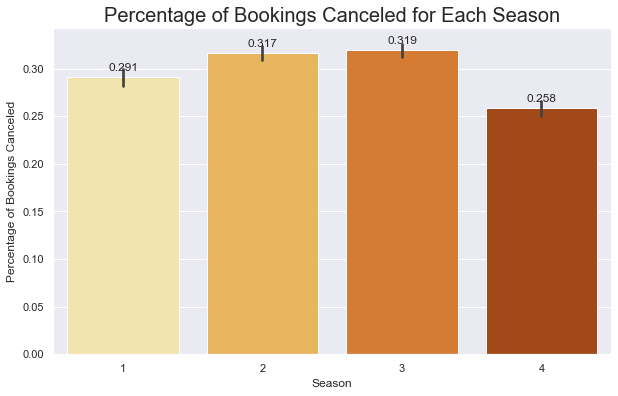

In [198]:
# To visualize ther percentage of bookings canceled for each deposit type
plt.figure(figsize=(10,6)) 
plt.title("Percentage of Bookings Canceled for Each Season", fontsize = 20)

splot = sns.barplot(x=data2['Seasons'], y=data2['IsCanceled'], palette='YlOrBr')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Season", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

## Enconding

In [176]:
non_metric_features

['MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'IsRepeatedGuest',
 'Seasons']

In [177]:
non_metric_features_OHC = ['MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType']

In [178]:
data_ohc = data2.copy()

In [179]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_ohc[non_metric_features_OHC ])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=data_ohc.index, columns=ohc_feat_names)  
ohc_df

,x0_Complementary,x0_Corporate,x0_Direct,x0_Groups,x0_Offline TA/TO,x0_Online TA,x1_Direct,x1_GDS,x1_TA/TO,x2_B,...,x3_D,x3_E,x3_F,x3_G,x3_K,x4_NonRefund,x4_Refundable,x5_Group,x5_Transient,x5_Transient-Party
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79326,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [180]:
data_ohc = pd.concat([data_ohc.drop(columns=non_metric_features_OHC), ohc_df], axis=1)
data_ohc.head()

,IsCanceled,LeadTime,ArrivalDateYear,Seasons,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x3_D,x3_E,x3_F,x3_G,x3_K,x4_NonRefund,x4_Refundable,x5_Group,x5_Transient,x5_Transient-Party
0,0,6,2015,3,27,1,0,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,88,2015,3,27,1,0,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,65,2015,3,27,1,0,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,92,2015,3,27,1,2,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,100,2015,3,27,2,0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Standartization

In [181]:
metric_features

['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'TotalOfSpecialRequests']

In [182]:
data_rs = data_ohc.copy()

In [183]:
robust_scaler = RobustScaler()
rs_feat = robust_scaler.fit_transform(data_rs[metric_features])
rs_feat

array([[-0.42307692, -0.5       ,  0.        , ...,  0.        ,
        -2.12200523, -1.        ],
       [ 0.36538462, -0.5       ,  1.        , ...,  0.        ,
        -0.58184014,  0.        ],
       [ 0.14423077, -0.5       ,  1.        , ...,  0.        ,
        -0.7529696 ,  0.        ],
       ...,
       [-0.15384615,  0.5       ,  1.5       , ...,  0.        ,
         1.0531508 ,  3.        ],
       [ 0.56730769,  0.5       ,  1.5       , ...,  0.        ,
        -0.02013288, -1.        ],
       [ 1.49038462,  0.5       ,  2.5       , ...,  0.        ,
         0.92208577,  1.        ]])

In [184]:
data_rs[metric_features] = rs_feat
data_rs.head()

,IsCanceled,LeadTime,ArrivalDateYear,Seasons,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x3_D,x3_E,x3_F,x3_G,x3_K,x4_NonRefund,x4_Refundable,x5_Group,x5_Transient,x5_Transient-Party
0,0,-0.423077,2015,3,27,1,-0.5,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.365385,2015,3,27,1,-0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.144231,2015,3,27,1,-0.5,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.403846,2015,3,27,1,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.480769,2015,3,27,2,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train test Split

In [185]:
data3 = data_rs.copy()

In [186]:
y = data3['IsCanceled']
X = data3.drop(columns=['IsCanceled','ReservationStatus', 'Country', 
                     'ReservationStatusDate', 'ArrivalDate',"Meal","ArrivalDateYear","ArrivalDateDayOfMonth","RequiredCarParkingSpaces","ArrivalDateWeekNumber","CancelationTime"])

In [187]:
X.columns

Index(['LeadTime', 'Seasons', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR',
       'TotalOfSpecialRequests', 'x0_Complementary', 'x0_Corporate',
       'x0_Direct', 'x0_Groups', 'x0_Offline TA/TO', 'x0_Online TA',
       'x1_Direct', 'x1_GDS', 'x1_TA/TO', 'x2_B', 'x2_C', 'x2_D', 'x2_E',
       'x2_F', 'x2_G', 'x3_B', 'x3_C', 'x3_D', 'x3_E', 'x3_F', 'x3_G', 'x3_K',
       'x4_NonRefund', 'x4_Refundable', 'x5_Group', 'x5_Transient',
       'x5_Transient-Party'],
      dtype='object')

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.30,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y
)

# Models

# Neural Network

### GridSearchCV for Neural Network

In [100]:
mlp = MLPClassifier()

In [102]:
 parameter_space = {
     'hidden_layer_sizes': [(10,10), (10,10,10), (12,10,10), (10,12,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive', 'invscaling'],
 }

In [103]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train)
clf.predict(X_train)
clf.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [104]:
# # Best parameter set
print('Best parameters found:\n', clf.best_params_)

print('---------------------------------------------------------------------------------------------------------------------')
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (12, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
---------------------------------------------------------------------------------------------------------------------
0.791 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.788 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.790 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.789 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.793 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.792 (+/-0.005) for {'act

### TTS

In [108]:
model = MLPClassifier(activation = "tanh", alpha = 0.001, hidden_layer_sizes = (10, 10, 10), learning_rate='adaptive', solver ='adam').fit(X_train, y_train)

In [109]:
pred_val = model.predict(X_val)
print('F1 Score:' ,f1_score(y_val, pred_val))
print('Mean Accuracy:' ,model.score(X_val, y_val))

F1 Score: 0.5857055589492974
Mean Accuracy: 0.7868636077938403


In [110]:
def run_model_NN(X,y):
    model = MLPClassifier(activation = "tanh", alpha = 0.001, hidden_layer_sizes = (10, 10, 10), learning_rate='adaptive', solver ='adam').fit(X_train, y_train)     
    return model

In [111]:
def evaluate_model(X,y, model):
    predictions = model.predict(X)
    return f1_score(y, predictions,average="micro")

In [112]:
def TTS_score_NN(X_train,y_train, X_val, y_val):
    model = run_model_NN(X_train, y_train)
    value_train = evaluate_model(X_train, y_train, model)
    value_val = evaluate_model(X_val,y_val, model)
    print('Train:', value_train)
    print('Val:', value_val)

In [113]:
TTS_NN=TTS_score_NN(X_train,y_train, X_val, y_val)
TTS_NN

Train: 0.8003879101341522
Val: 0.787115021998743


In [114]:
labels_train = model.predict(X_train)

In [115]:
labels_val = model.predict(X_val)

In [116]:
print('Confusion matrix of the validation set:')
print(confusion_matrix(y_true=y_val,y_pred=labels_val))

Confusion matrix of the validation set:
[[10122  1004]
 [ 2387  2397]]


In [117]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [118]:
metrics(y_train, labels_train , y_val,  labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.86     25960
           1       0.73      0.52      0.61     11162

    accuracy                           0.80     37122
   macro avg       0.77      0.72      0.74     37122
weighted avg       0.79      0.80      0.79     37122

[[23875  2085]
 [ 5399  5763]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Kfold and Repeated Kfold

In [119]:
kf = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=10, n_repeats=2)

In [120]:
def avg_score_NN(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_NN(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [121]:
KF_NN=avg_score_NN(kf,X,y)
KF_NN

Train: 0.7961524943665385
Test: 0.7936390838846163


In [122]:
RKF_NN=avg_score_NN(rkf,X,y) 
RKF_NN

Train: 0.7954138796489907
Test: 0.795510260705045


# **Logistic Regression**

In [74]:
# F1 SCORE 
def evaluate_model(X,y, model):
    predictions = model.predict(X)
    return f1_score(y, predictions,average="micro")

In [75]:
# LOGISTIC REGRESSION MODEL
def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_LR(X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [76]:
# LOGISTIC REGRESSION MODEL
def run_model_LR(X,y):
    model = LogisticRegression().fit(X,y)
    return model

In [77]:
logM = LogisticRegression()
logM.fit(X_train, y_train)
pred_train = logM.predict(X_train)
pred_val = logM.predict(X_val)

print('Train:', logM.score(X_train, y_train))
print('Test:', logM.score(X_val, y_val))

metrics(y_train, pred_train , y_val, pred_val)

Train: 0.7649102957814773
Test: 0.757950974230044
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     25960
           1       0.69      0.39      0.50     11162

    accuracy                           0.76     37122
   macro avg       0.74      0.66      0.67     37122
weighted avg       0.75      0.76      0.74     37122

[[24047  1913]
 [ 6814  4348]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------

# Naive Bayes

**Bernoulli**

In [79]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X,y)

pred_train = BernNB.predict(X_train)
pred_val = BernNB.predict(X_val)

print('Train:', BernNB.score(X_train, y_train))
print('Test:', BernNB.score(X_val, y_val))

metrics(y_train, pred_train , y_val, pred_val)

Train: 0.7012822584990033
Test: 0.6991829038340667
__
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.98      0.82     25960
           1       0.53      0.06      0.11     11162

    accuracy                           0.70     37122
   macro avg       0.62      0.52      0.47     37122
weighted avg       0.65      0.70      0.61     37122

[[25335   625]
 [10464   698]]
__
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.97      0.82     11126
           1       0.50      0.06      0.11 

**Gaussian**

In [80]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
pred_train = GausNB.predict(X_train)
pred_val = GausNB.predict(X_val)

print('Train:', GausNB.score(X_train, y_train))
print('Test:', GausNB.score(X_val, y_val))

metrics(y_train, pred_train , y_val, pred_val)

Train: 0.4955551963795054
Test: 0.49409176618478945
__
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.34      0.49     25960
           1       0.36      0.86      0.51     11162

    accuracy                           0.50     37122
   macro avg       0.60      0.60      0.50     37122
weighted avg       0.70      0.50      0.49     37122

[[ 8819 17141]
 [ 1585  9577]]
__
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.34      0.48     11126
           1       0.36      0.86      0.51

## Random Forest

In [82]:
model = RandomForestClassifier(n_estimators=125, criterion="gini", max_features=None, random_state=5, max_depth = 20)
model.fit(X_train, y_train) #Best estimators 125, gini, max features none, max depth 20
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

print('Train:', model.score(X_train, y_train))
print('Test:', model.score(X_val, y_val))

metrics(y_train, pred_train , y_val, pred_val)

Train: 0.9121814557405312
Test: 0.7888749214330609
__
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     25960
           1       0.90      0.80      0.85     11162

    accuracy                           0.91     37122
   macro avg       0.91      0.88      0.89     37122
weighted avg       0.91      0.91      0.91     37122

[[24916  1044]
 [ 2216  8946]]
__
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     11126
           1       0.69      0.54      0.61 

# Decision Trees #

In [83]:
clf = DecisionTreeClassifier()

In [84]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred = clf.predict(X_val)

In [86]:
accuracy_score(y_val, y_pred)

0.7191703331238215

**Grid Search for Hyperparameter decisions**

In [87]:
param_dist={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,20,None],
    'max_features' : [1,2,3,None],
    'min_samples_split': [100,200,300,400,None]
}

In [88]:
grid=GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'max_features': [1, 2, 3, None],
                         'min_samples_split': [100, 200, 300, 400, None]})

In [90]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=100)

In [91]:
grid.best_score_

0.7840904394624666

In [92]:
dt_final = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=10, min_samples_split=100)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=100, splitter='random')

The defined tree has a depth of 10, 297 nodes and a total of 149 leaves.


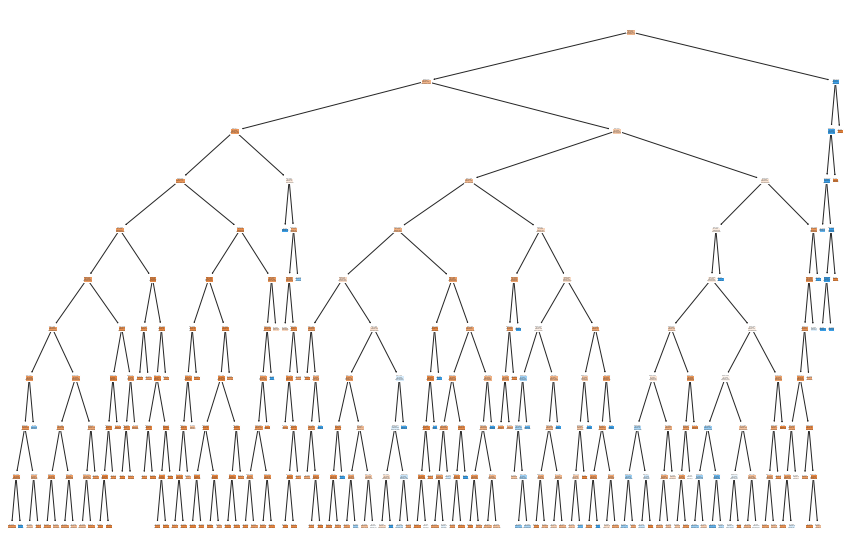

In [93]:
y_pred_train=dt_final.predict(X_train)
y_pred_val = dt_final.predict(X_val)
plt.figure(figsize=(15,10))
tree.plot_tree(dt_final,filled=True)
print('The defined tree has a depth of ' + str(dt_final.get_depth()) + ', ' + str(dt_final.tree_.node_count) + 
   ' nodes and a total of ' + str(dt_final.get_n_leaves()) + ' leaves.')

In [94]:
collections.Counter(y_pred_train)

Counter({1: 9002, 0: 28120})

In [95]:
collections.Counter(y_pred_val)

Counter({0: 11970, 1: 3940})

In [97]:
y_train_pred = dt_final.predict(X_train)
y_test_pred = dt_final.predict(X_val)
metrics(y_train,y_train_pred,y_val,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25960
           1       0.67      0.54      0.60     11162

    accuracy                           0.78     37122
   macro avg       0.74      0.71      0.72     37122
weighted avg       0.77      0.78      0.77     37122

[[22996  2964]
 [ 5124  6038]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------